# Churn prediction

Building customer relationships or customer relationship management (CRM) is an important link in the functioning of any business. The success of the whole company often depends on how well the work with the audience is built. In our project we will face one of the most urgent tasks in the field of CRM: churn prediction. The essence of the task is to find in advance a segment of users who are inclined, after a certain period of time, to refuse to use a certain product or service. The exact and timely finding of such users allows you to effectively deal with their churn, for example, to identify the causes of the churn and take measures to retain customers. This task is relevant for most organizations providing services in the B2C segment and is doubly relevant in areas where the distribution of services is close to 100%. A good example of such an area is the mobile communications market, where saturation has actually occurred, and as a result, the growth of the customer base is gradually decreasing. In such a situation, the task of retaining customers and building relationships with them comes to the fore. In the process of working on our project, we expect to learn how to mathematically set the task of forecasting churn, build and optimize forecast models, assess their quality and economic potential. And, of course, we can apply the gained knowledge and experience in the future to solve a similar problem in the area of our work.

In this task, we will practice doing descriptive analysis and visualization of the so-called “closed” data - data that is provided for analyzing and building models without a description. The sample with which we will work is attached.

Class labels (here 1 corresponds to the outflow class, -1 to the non-outflow class) - orange_small_churn_labels.train
The data (provided without description, but it is known that the first 190 variables are numeric, and the remaining 40 are categorical) - orange_small_churn_data.train

In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats.stats import pearsonr

In [3]:
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [4]:
data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train', header=None)

Let's look on our data

In [5]:
data.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [6]:
data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [7]:
labels.head(5)

,0
0,-1
1,-1
2,-1
3,1
4,-1


For further analysis and selection of metrics, it is desirable to understand what part of the entire dataset the classes "outflow" and "not outflow" constitute.

In [5]:
print (len(labels[labels.values == 1]),'/', len(labels[labels.values == -1]))

2976 / 37024


In [6]:
data_full = data
data_full['target'] = labels

In [7]:
data_full.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In order to analyze the measure of the relationship between the features and the target variable, let's calculate the Kendall correlation coefficient

In [8]:
data_full = data_full.fillna(0)

In [9]:
from sklearn.preprocessing import LabelEncoder

Let's encode categorical variables

In [10]:
label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(data_full[data_full.columns[190 + i]].values.astype(str))
    #integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    #onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    for j in range(len(data_full)):
        if type(data_full[data_full.columns[190 + i]].values[j]) == str:
            data_full[data_full.columns[190 + i]].values[j] = integer_encoded[j]
    print(integer_encoded)

[0 0 0 ... 0 0 0]
[160 169 115 ...  88 241 158]
[ 5  0 17 ... 25 25 25]
[0 0 0 ... 0 0 0]
[22 22 22 ... 22 22 22]
[0 0 0 ... 0 0 0]
[  1 127 111 ...  18  18 172]
[1961  743 2693 ...  929 2751 2141]
[1236 3521 3463 ... 1516 2825 1346]
[   0 3020    0 ... 9417    0    0]
[0 0 0 ... 0 0 0]
[1384 1776 3589 ... 3394  670   89]
[1 1 1 ... 1 1 1]
[79 28 83 ... 36 13 43]
[1 2 2 ... 1 2 2]
[ 7 12 11 ...  4 21 21]
[ 7 10  4 ... 10 10 10]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[5 5 5 ... 5 5 5]
[0 0 0 ... 0 0 1]
[27 43  5 ... 43 32 32]
[0 0 0 ... 0 0 0]
[   0 3922    0 ... 7112    0    0]
[0 0 0 ... 0 0 0]
[ 667  733 1470 ...  712 1185  114]
[ 4141 10558 10555 ...  3915  8364  4180]
[2 2 1 ... 2 2 1]
[12 12 12 ... 12 12 12]
[2855 2864  328 ...  752 1787 1905]
[0 4 6 ... 4 4 4]
[3696  347 2498 ... 3305 2037 1728]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[0 1 0 ... 1 0 0]
[14 22  7 ... 12 20  7]
[0 2 3 ... 2 2 2]
[29  2 25 ...  8  8  8]
[0 2 2 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [12]:
data_full = data_full.apply(pd.to_numeric)

In [13]:
data_correlation = data_full.corr(method='kendall')

Let's visualize the data: consider the top 20 numeric variables that most closely correlate with the objective function. For these variables, build:

1) Distributions by class
2) Display objects in feature pair coordinates

In [14]:
corr = data_correlation.sort_values(by = 'target', ascending = False)['target'][1:21]

In [15]:
corr.keys()

Index(['Var207', 'Var81', 'Var205', 'Var193', 'Var113', 'Var126', 'Var28',
       'Var38', 'Var195', 'Var134', 'Var220', 'Var123', 'Var216', 'Var153',
       'Var133', 'Var76', 'Var203', 'Var83', 'Var196', 'Var163'],
      dtype='object')

In [16]:
min_corr = data_correlation.sort_values(by = 'target', ascending = True)['target'][1:21]

In [17]:
min_corr.keys()

Index(['Var218', 'Var229', 'Var7', 'Var13', 'Var140', 'Var73', 'Var200',
       'Var214', 'Var225', 'Var210', 'Var125', 'Var211', 'Var144', 'Var227',
       'Var228', 'Var135', 'Var6', 'Var11', 'Var189', 'Var152'],
      dtype='object')

In [18]:
data_top_corr = pd.DataFrame(data_full['Var207'])

In [19]:
for i in corr.keys()[1:]:
    data_top_corr[str(i)] = data_full[str(i)]

In [20]:
data_top_corr['target'] = data_full['target']

In [21]:
data_top_corr.head(5)

,Var207,Var81,Var205,Var193,Var113,Var126,Var28,Var38,Var195,Var134,...,Var123,Var216,Var153,Var133,Var76,Var203,Var83,Var196,Var163,target
0,7,14599.92,1,5,-1209960.0,4.0,200.00,82752.0,22,604276.0,...,66.0,667,2313888.0,326915.0,716008.0,1,5.0,0,599532.0,-1
1,10,67529.09,2,0,417932.0,40.0,166.56,2706120.0,22,349568.0,...,66.0,733,6502680.0,1934460.0,1661128.0,1,25.0,0,364182.0,-1
2,4,85266.00,2,17,-124655.2,36.0,311.76,4698780.0,22,1086210.0,...,78.0,1470,10569040.0,3148410.0,3025152.0,1,35.0,0,0.0,-1
3,10,74107.20,2,25,378473.6,0.0,220.08,864384.0,22,650390.0,...,24.0,1185,9676200.0,7066700.0,2642240.0,2,10.0,0,253284.0,1
4,10,171072.90,3,25,142602.4,-28.0,278.00,4364880.0,22,642816.0,...,60.0,409,10535200.0,3794460.0,1440.0,1,25.0,0,2851284.0,-1


Minimum correlation

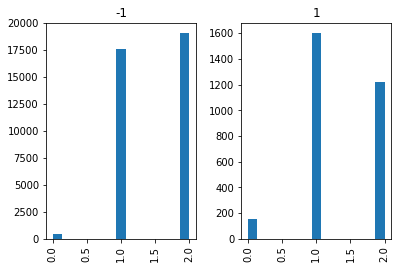

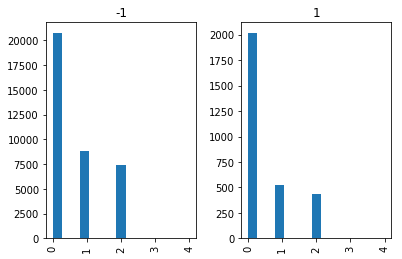

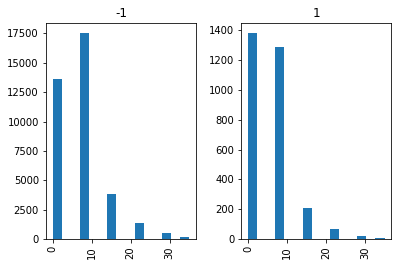

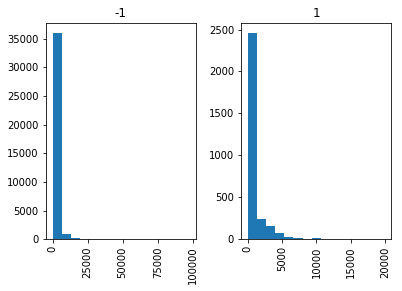

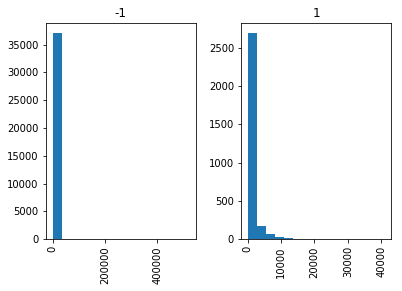

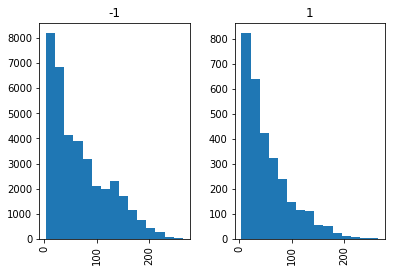

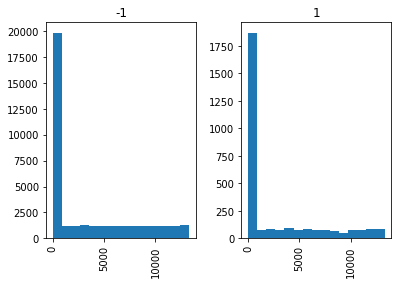

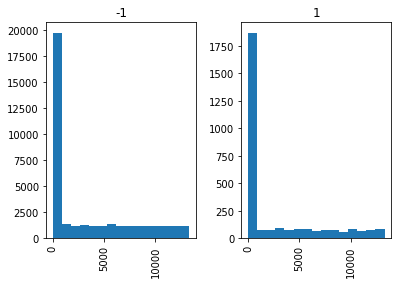

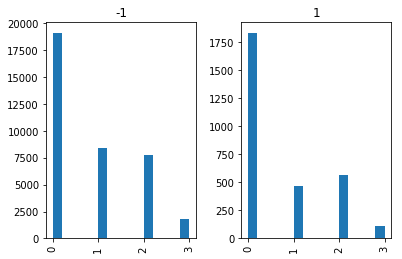

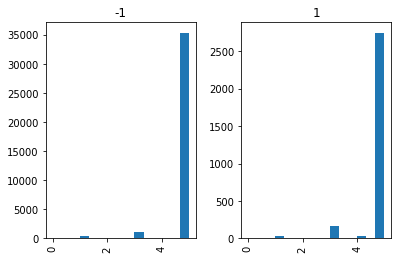

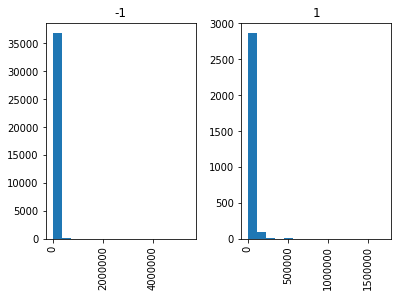

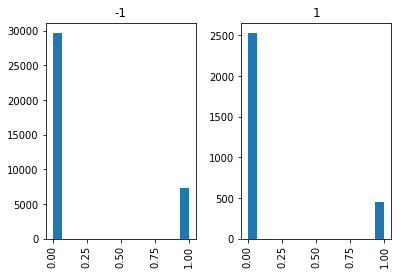

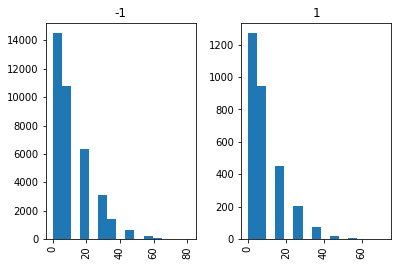

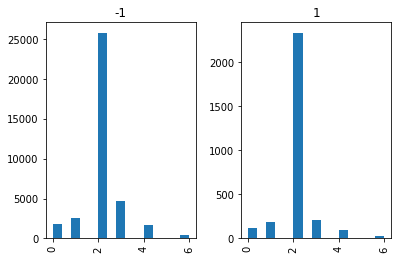

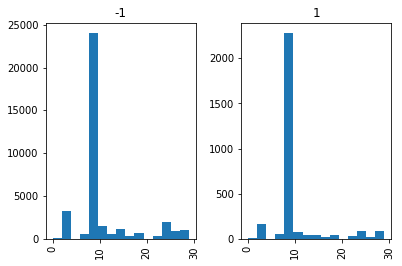

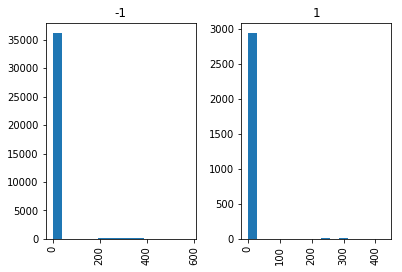

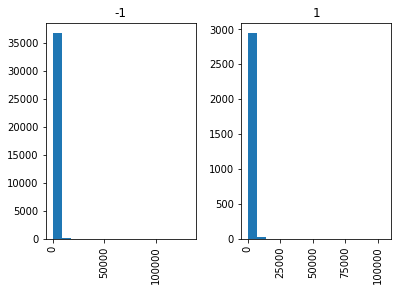

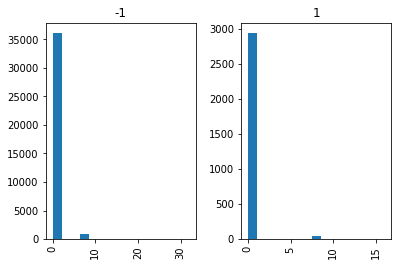

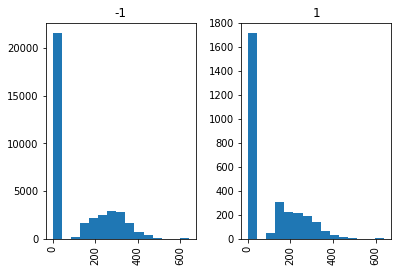

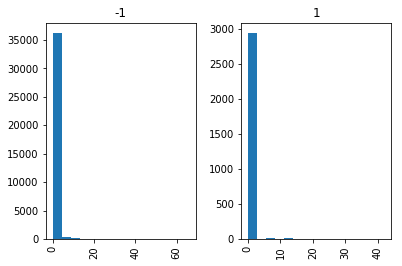

In [23]:
data_min_corr = pd.DataFrame(data_full['Var218'])
for i in min_corr.keys():
    data_full[str(i)].hist(by=data_full['target'], bins=15)
    plt.show()

Maximum correlation

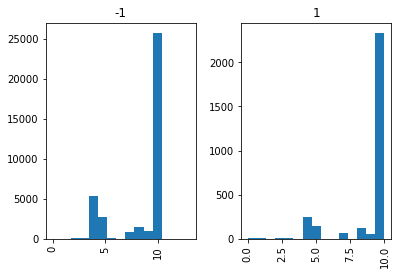

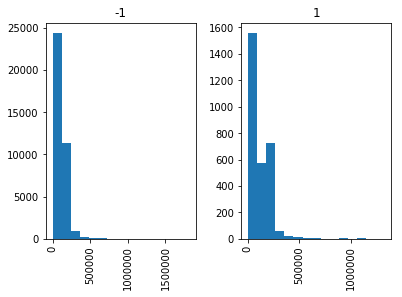

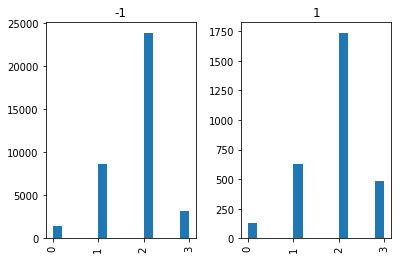

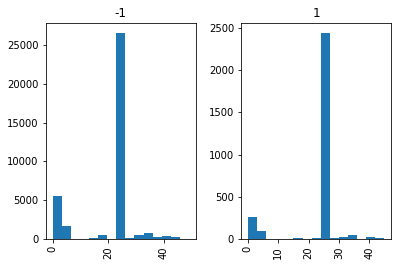

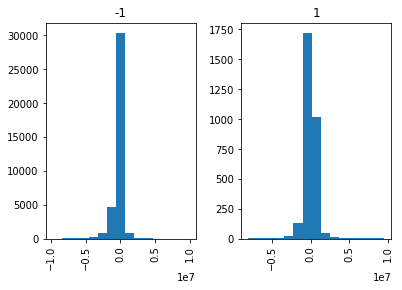

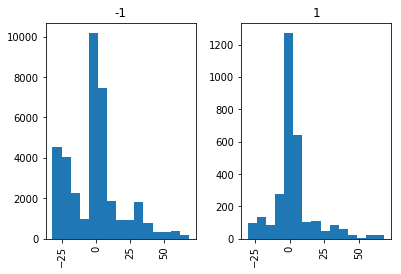

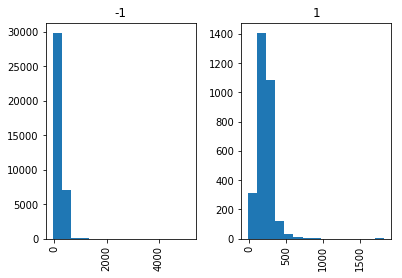

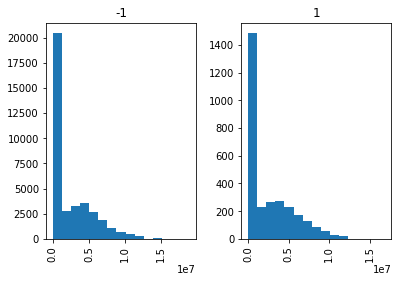

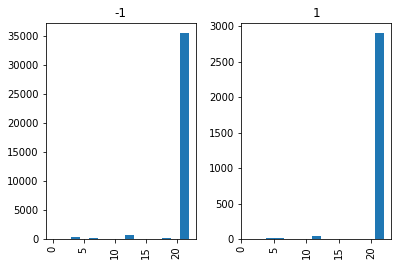

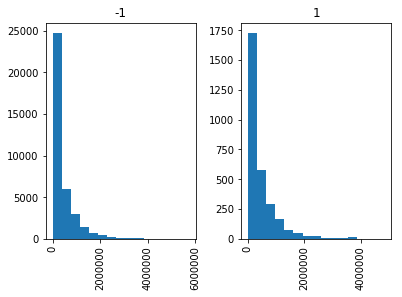

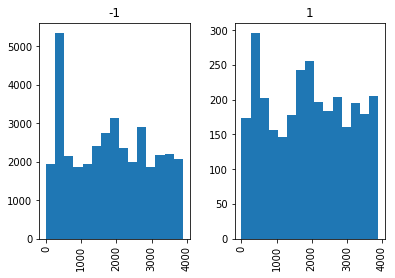

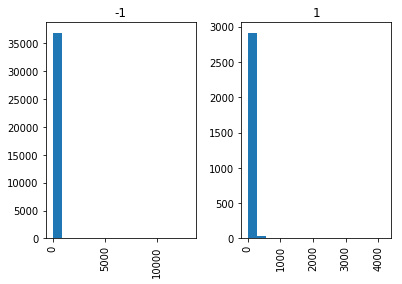

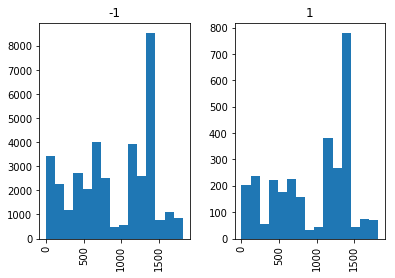

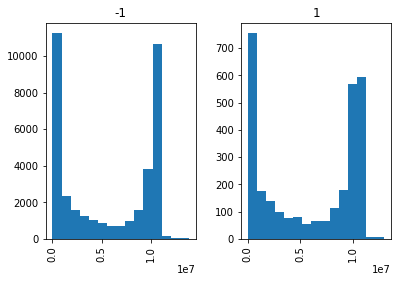

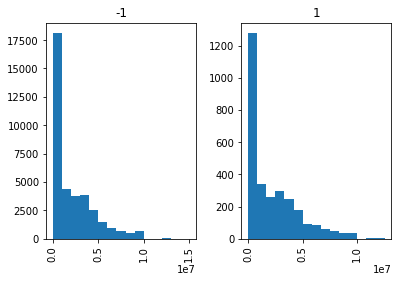

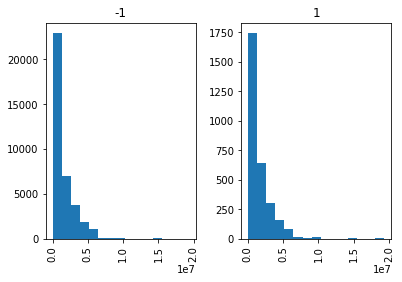

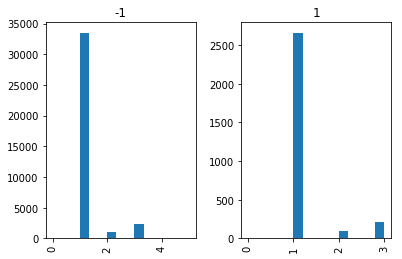

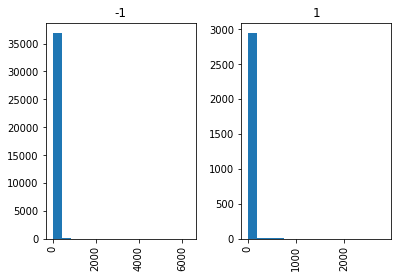

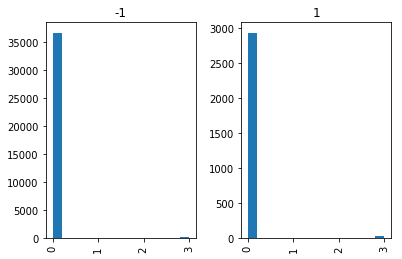

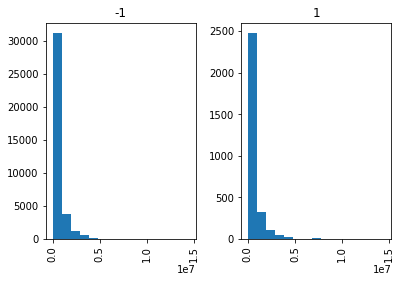

In [24]:
for i in corr.keys():
    data_full[str(i)].hist(by=data_full['target'], bins=15)
    plt.show()

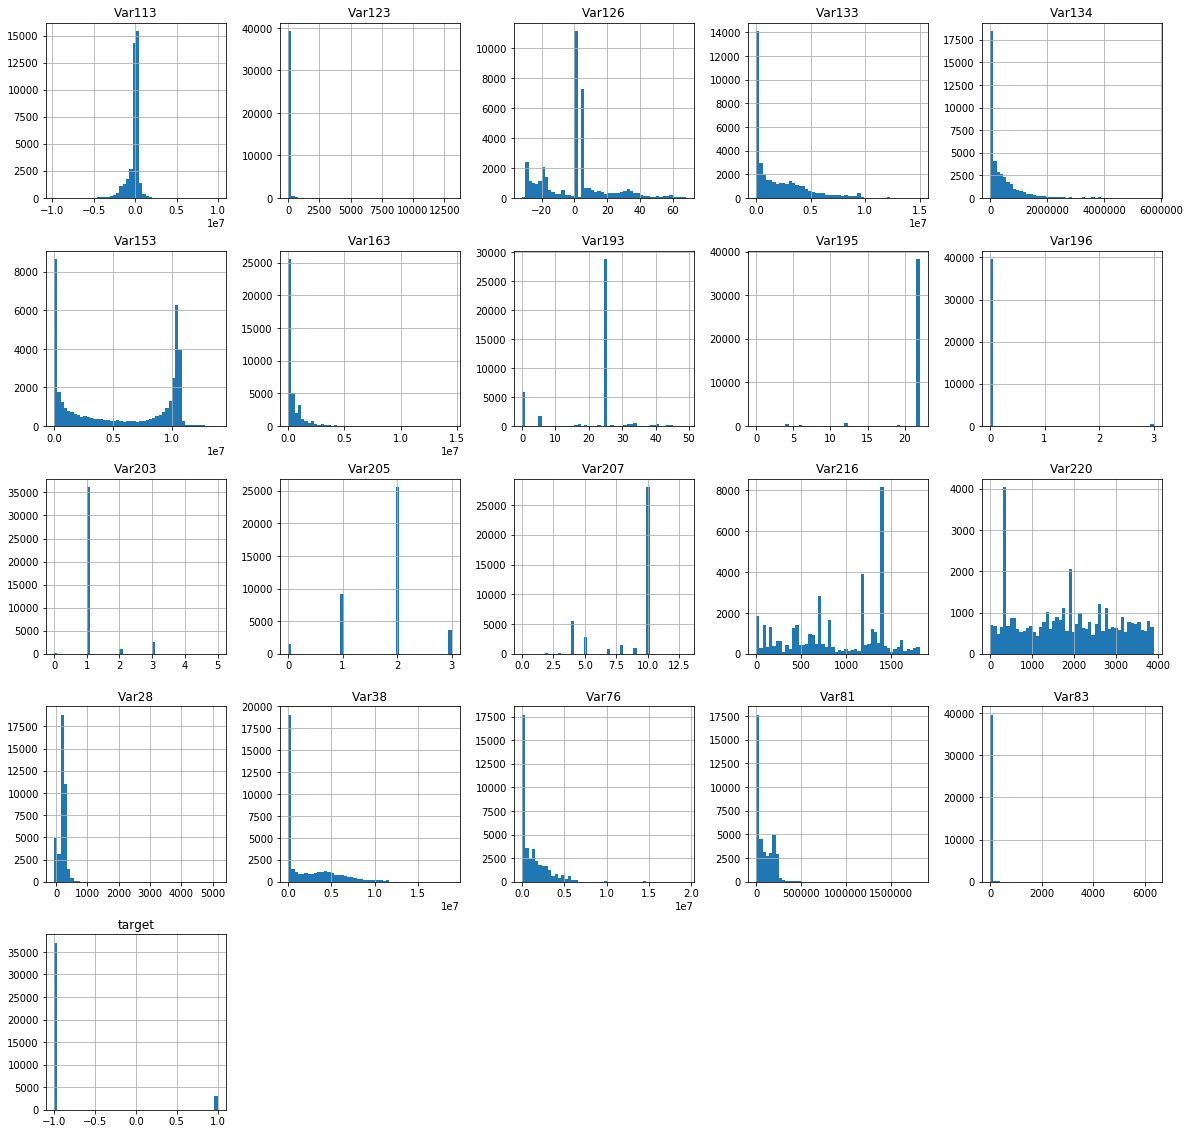

In [25]:
data_top_corr.hist(figsize=(20,20), bins=50)
plt.show()

In [26]:
del data_full['target']

In [27]:
from sklearn.utils import shuffle
from sklearn import model_selection

Firstly, we need to shuffle our data to avoid effect of label ordering in our dataset

In [28]:
churn_data_shuffled = shuffle(data_full, random_state=123)
churn_labels_shuffled = shuffle(labels, random_state=123)

In [29]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(churn_data_shuffled, churn_labels_shuffled, 
                                                                                     test_size = 0.3)

In [30]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Ridge

In [31]:
ridge_classifier = RidgeClassifier(random_state = 1)
ridge_classifier.fit(train_data, train_labels.values.ravel())
ridge_predictions = ridge_classifier.predict(test_data)

c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.359474544848642e-19 / 1.1102230246251565e-16
  RuntimeWarning)


In [32]:
ridge_classifier.coef_

array([[-1.48830833e-02, -6.72708772e-02, -3.79072328e-07,
         2.80289290e-03, -4.50758944e-08, -2.73190810e-06,
        -2.20178895e-03,  0.00000000e+00, -4.65904440e-03,
         9.74732737e-09, -1.03564243e-02,  3.77418053e-03,
         2.61648502e-07, -6.58880542e-03,  0.00000000e+00,
         1.13027950e-05,  5.36034953e-03, -1.62989830e-03,
         2.97250263e-02,  0.00000000e+00,  3.51545950e-04,
        -2.76509059e-04, -8.19509516e-04, -6.99247661e-04,
         4.26525599e-05,  1.06612871e-02, -2.18917182e-02,
         4.81694583e-05, -4.06007900e-03, -1.79351451e-02,
         0.00000000e+00,  0.00000000e+00, -5.49594985e-08,
         1.03401041e-02, -4.82648823e-03, -4.05928203e-08,
        -3.25610831e-08, -2.49208184e-09,  0.00000000e+00,
         1.84634985e-04,  8.18050357e-03,  0.00000000e+00,
        -3.32053111e-03, -4.37564750e-03, -1.72764363e-06,
         1.47725443e-03, -2.03606795e-03,  0.00000000e+00,
        -1.42288111e-02, -4.06815884e-05, -3.28822191e-0

In [33]:
print(test_labels.values.ravel())

[-1 -1 -1 ... -1 -1 -1]


In [34]:
print(ridge_predictions)

[-1 -1 -1 ... -1 -1 -1]


In [35]:
ridge_classifier.intercept_ 

array([-0.65071059])

# ROC AUC

In [36]:
metrics.roc_auc_score(test_labels, ridge_predictions)

0.4999550157444894

# Precision

In [37]:
metrics.precision_score(test_labels, ridge_predictions, pos_label = -1)

0.9262438536544713

In [38]:
metrics.precision_score(test_labels, ridge_predictions)

0.0

# Recall

In [39]:
metrics.recall_score(test_labels, ridge_predictions, pos_label = -1)

0.9999100314889788

In [40]:
metrics.recall_score(test_labels, ridge_predictions)

0.0

# cross_validation

In [41]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [42]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, data_full, labels.values.ravel(), scoring = scorer, cv = cv_strategy)

c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0454165366718593e-19 / 1.1102230246251565e-16
  RuntimeWarning)
c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.068156451352505e-19 / 1.1102230246251565e-16
  RuntimeWarning)
c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0558321296165823e-19 / 1.1102230246251565e-16
  RuntimeWarning)
c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-cond

In [43]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.4998784572169404, max:0.49994598098530685, min:0.4998379429559205, std:4.479020082049092e-05


# Random forest

In [44]:
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
rf_classifier.fit(train_data, train_labels.values.ravel())
rf_predictions = rf_classifier.predict(test_data)

In [45]:
metrics.roc_auc_score(test_labels, rf_predictions)

0.5

In [46]:
metrics.recall_score(test_labels, rf_predictions, pos_label = -1)

1.0

In [47]:
metrics.recall_score(test_labels, rf_predictions)

0.0

In [48]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [49]:
rf_scoring = cross_validation.cross_val_score(rf_classifier, data_full, labels.values.ravel(), scoring = scorer, cv = cv_strategy)

In [50]:
print('Random forest mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring.mean(), rf_scoring.max(), 
                                                     rf_scoring.min(), rf_scoring.std()))

Random forest mean:0.5, max:0.5, min:0.5, std:0.0


# Gradient boosting

In [51]:
gb_classifier = GradientBoostingClassifier(n_estimators = 50, random_state = 1)
gb_classifier.fit(train_data, train_labels.values.ravel())
gb_predictions = gb_classifier.predict(test_data)

In [52]:
metrics.roc_auc_score(test_labels, gb_predictions)

0.5042048842227254

In [53]:
metrics.precision_score(test_labels, gb_predictions, pos_label = -1)

0.9268251981643721

In [54]:
metrics.precision_score(test_labels, gb_predictions)

0.5333333333333333

In [55]:
metrics.recall_score(test_labels, gb_predictions, pos_label = -1)

0.999370220422852

In [56]:
metrics.recall_score(test_labels, gb_predictions)

0.00903954802259887

In [57]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [58]:
gb_scoring = cross_validation.cross_val_score(gb_classifier, data_full, labels, scoring = scorer, cv = cv_strategy)

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [59]:
print('Gradient boosting mean:{}, max:{}, min:{}, std:{}'.format(gb_scoring.mean(), gb_scoring.max(), 
                                                     gb_scoring.min(), gb_scoring.std()))

Gradient boosting mean:0.504756722753506, max:0.5075783449967938, min:0.5023640579548517, std:0.0018563563286102696


In [60]:
from sklearn.model_selection import learning_curve

In [61]:
import xgboost as xgb

In [76]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.05, max_delta_step=1, max_depth=3, min_child_weight=20, n_estimators=500, subsample=0.1) 
xgb_classifier.fit(train_data, train_labels.values.ravel(), eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [81]:
metrics.roc_auc_score(test_labels, xgb_predictions_proba)

0.7109763616632484

We will improve xgb classifier

# Fine-tuning model

Let's estimate how many objects we really need to build a quality model. A sufficiently large sample is available for training and it may turn out that, starting from a certain point, the growth of the size of the training sample ceases to influence the quality of the model. Let's draw learning curves by training the model on samples of different sizes starting with a small number of objects in the training sample and gradually increasing its size with a certain step. Pay attention to sklearn.model_selection.learning_curve

In [66]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [73]:
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, data_full, 
                                                        labels.values.ravel(), train_sizes = np.linspace(0.1, 1.0, 6),
                                                        cv=cv_strategy, scoring = 'roc_auc')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

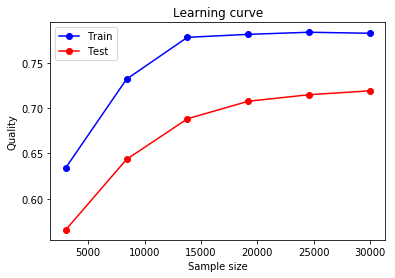

In [74]:
plt.figure()
plt.title("Learning curve")
plt.xlabel("Sample size")
plt.ylabel("Quality")

plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
    label="Train")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
    label="Test")
plt.legend()

## Result
As the sample size grows, the quality grows in training and, on the test

In [93]:
weight_ratio = float(len(train_labels[train_labels[0] == -1])) / float(len(train_labels[train_labels[0] == 1]))
print(weight_ratio)

12.390722142515543


In [100]:
from sklearn.metrics import roc_auc_score

In [101]:
w1 = np.array([1]*train_labels.shape[0])
w1[train_labels[0] == -1] = 1
w1[train_labels[0] == 1] = weight_ratio
xgb_classifier.fit(train_data, train_labels.values.ravel(), sample_weight = w1, eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
print(roc_auc_score(test_labels, xgb_predictions_proba))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7115415367333299
